In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

<h2><b>Dataset</b></h2>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>Diabetes_binary</td>
<td>Diabetes status</td>
<td>0 = No diabetes, 1 = Diabetes</td>
</tr>
<tr>
<td>HighBP</td>
<td>High blood pressure</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HighChol</td>
<td>High cholesterol</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>CholCheck</td>
<td>Cholesterol check in past 5 years</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>BMI</td>
<td>Body Mass Index</td>
<td></td>
</tr>
<tr>
<td>Smoker</td>
<td>Smoked ≥100 cigarettes</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Stroke</td>
<td>History of stroke</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HeartDiseaseorAttack</td>
<td>History of Heart disease or heart attack</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>PhysActivity</td>
<td>Physical activity in past 30 days</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Fruits</td>
<td>Fruit consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>Veggies</td>
<td>Vegetable consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>HvyAlcoholConsump</td>
<td>Heavy alcohol consumption (adult men >=14 drinks per week and adult women>=7 drinks per week)</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HealthCare</td>
<td>Health insurance coverage</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>NoDocbcCost</td>
<td>Couldn't see doctor due to cost in the past 12 months</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>GenHlth</td>
<td>General health rating</td>
<td>1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor</td>
</tr>
<tr>
<td>MentHlth</td>
<td>Poor mental health days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>PhysHlth</td>
<td>Physical illness/injury days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>DiffWalk</td>
<td>Difficulty walking/climbing stairs</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Sex</td>
<td>Gender</td>
<td>0 = Female, 1 = Male</td>
</tr>
<tr>
<td>Age</td>
<td>Age category</td>
<td>
1 = 18-24<br>
2 = 25-29<br>
3 = 30-34<br>
4 = 35-39<br>
5 = 40-44<br>
6 = 45-49<br>
7 = 50-54<br>
8 = 55-59<br>
9 = 60-64<br>
10 = 65-69<br>
11 = 70-74<br>
12 = 75-79<br>
13 = 80+
</td>
</tr>
<tr>
<td>Education</td>
<td>Education level</td>
<td>
1 = Never attended school/kindergarten<br>
2 = Elementary (Grades 1-8)<br>
3 = Some high school (Grades 9-11)<br>
4 = High school graduate/GED<br>
5 = Some college/technical school (1-3 years)<br>
6 = College graduate (4+ years)
</td>
</tr>
<tr>
<td>Income</td>
<td>Annual income</td>
<td>
1 = &lt;$10,000<br>
2 = $10k-&lt;$15k<br>
3 = $15k-&lt;$20k<br>
4 = $20k-&lt;$25k<br>
5 = $25k-&lt;$35k<br>
6 = $35k-&lt;$50k<br>
7 = $50k-&lt;$75k<br>
8 = ≥$75k
</td>
</tr>
</tbody>
</table>

In [41]:
df.drop_duplicates(inplace=True)
df = df.astype(int)

In [42]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219451,1,1,0,1,49,0,0,0,0,0,...,1,0,4,0,0,1,0,7,5,5
200438,0,1,0,1,39,1,0,1,1,1,...,1,0,2,1,25,0,1,10,5,5
242252,1,0,0,1,28,0,0,0,0,1,...,1,0,5,0,30,1,1,9,5,2
84627,0,1,0,1,36,1,0,0,0,1,...,1,0,2,0,0,0,0,11,6,8
76372,0,0,1,1,73,0,0,0,1,1,...,1,0,2,30,0,0,1,9,5,7


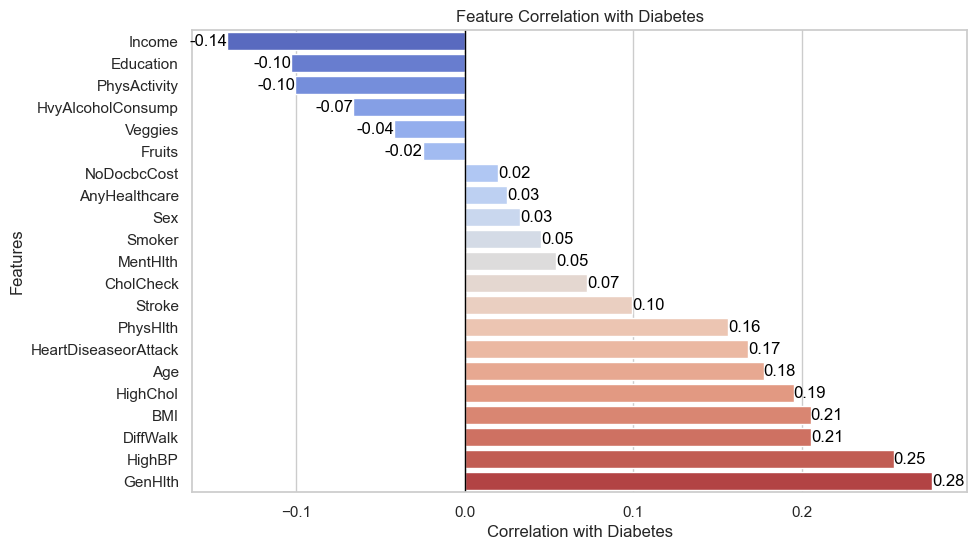

In [43]:
# Compute correlation with Diabetes_binary
corr_values = df.corr()['Diabetes_binary'].drop('Diabetes_binary')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False)  # Fixed: Assigned hue and disabled legend

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax.text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

plt.axvline(0, color='black', linewidth=1)  # Vertical line at 0
plt.xlabel('Correlation with Diabetes')
plt.ylabel('Features')
plt.title('Feature Correlation with Diabetes')
plt.show()

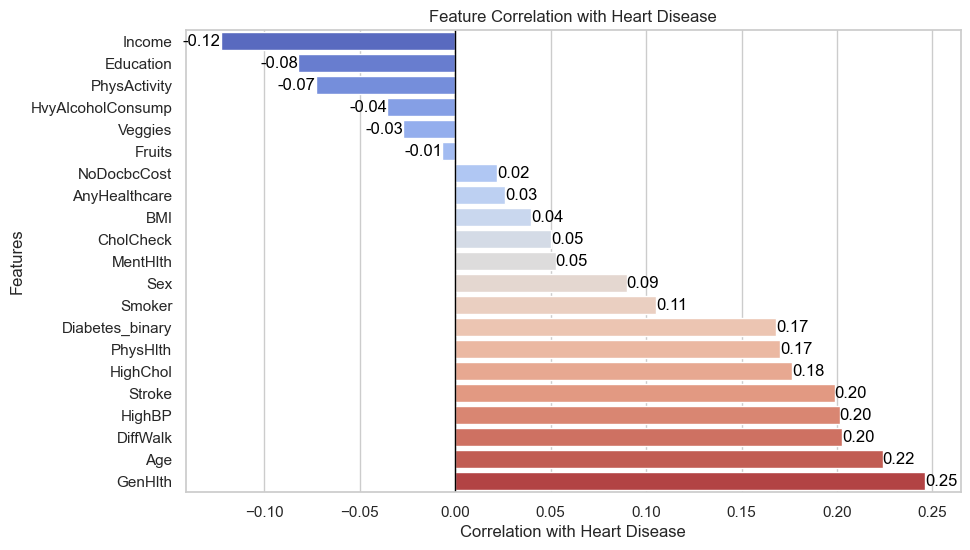

In [44]:
# Compute correlation with HeartDiseaseorAttack
corr_values = df.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False)  # Fixed: Assigned hue and disabled legend

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax.text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

plt.axvline(0, color='black', linewidth=1)  # Vertical line at 0
plt.xlabel('Correlation with Heart Disease')
plt.ylabel('Features')
plt.title('Feature Correlation with Heart Disease')
plt.show()

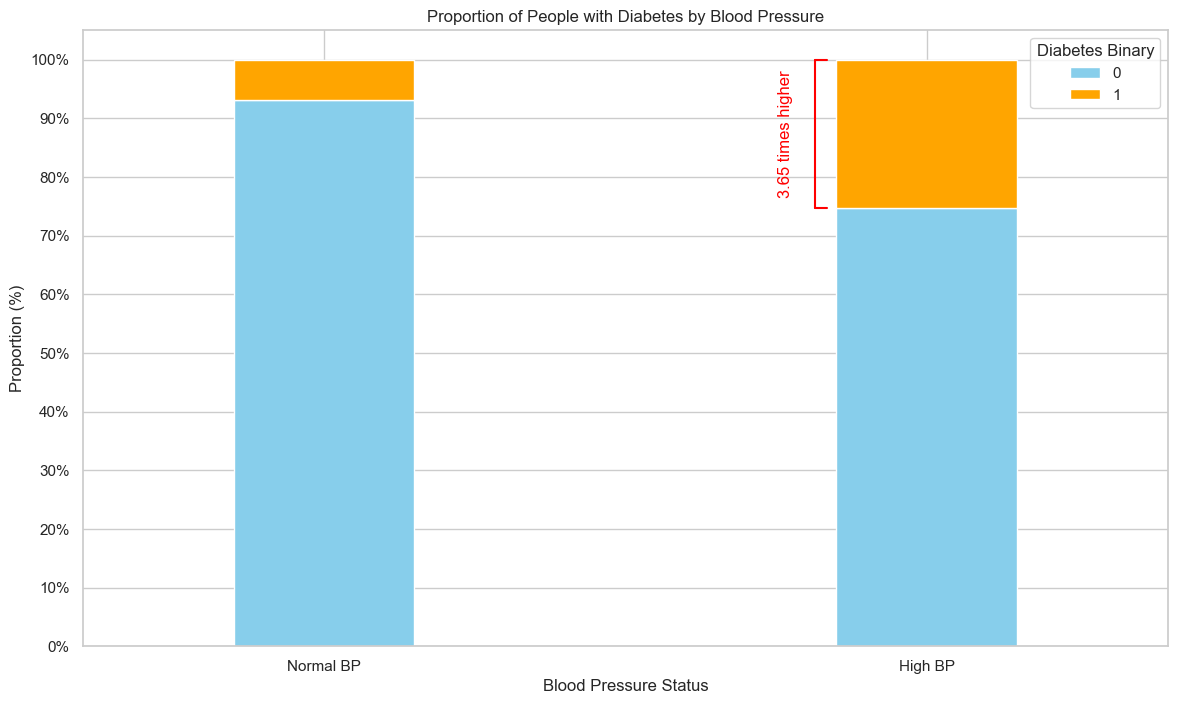

In [45]:
# Group by HighBP and calculate the proportions for Diabetes_binary
grouped_data = df.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True).unstack()

# Calculate the ratio of Diabetes proportion between HighBP = 1 and HighBP = 0
ratio = grouped_data.loc[1, 1] / grouped_data.loc[0, 1]
ratio_text = f'{ratio:.2f} times higher'

# Plot the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(14,8), width=0.3)

# Change the y-ticks to range from 0 to 100 (as percentages)
ax.set_yticks([i / 100 for i in range(0, 101, 10)])  # Tick marks from 0 to 1, in increments of 0.1 (10%)
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)])  # Labels as percentages

# Change x labels to "Normal BP" and "High BP"
ax.set_xticklabels(['Normal BP', 'High BP'])

# Make x labels horizontal
plt.xticks(rotation=0)  # Set x labels to horizontal

# Set the labels and title
plt.xlabel('Blood Pressure Status')
plt.ylabel('Proportion (%)')
plt.title('Proportion of People with Diabetes by Blood Pressure')

# Add the legend
plt.legend(title='Diabetes Binary', loc='upper right')

# Add the mirrored square brace to the left of the second bar
y_start = grouped_data.loc[1, 0]  # Starting y-coordinate
y_end = 1  # Ending y-coordinate

# Add the mirrored square brace to the left of the second bar
x = ax.patches[1].get_x() - 0.035  # Adjust position to the left of the second bar
plt.plot([x, x], [y_start, y_end], color='red')  # Vertical line
plt.plot([x, x+0.02], [y_start, y_start], color='red')  # Bottom horizontal line
plt.plot([x, x+0.02], [y_end, y_end], color='red')  # Top horizontal line

# Add the sideways text next to the mirrored brace
plt.text(x-0.05, (y_start + y_end) / 2, ratio_text, rotation=90, ha='center', va='center', fontsize=12, color='red')

# Show the plot
plt.show()

People with **High Blood Pressure** are `3.65` times more likely to have **Diabetes**.

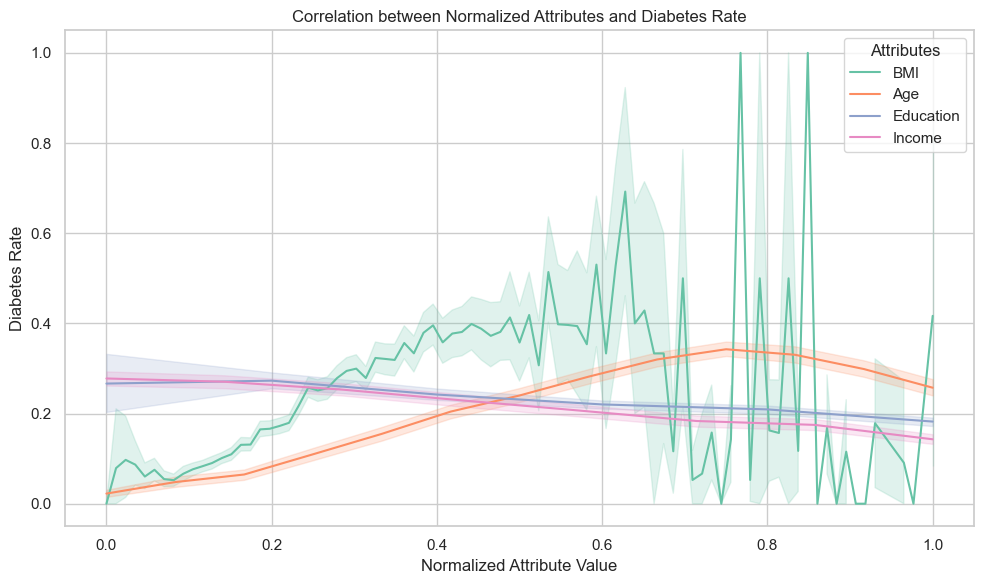

In [46]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the continuous columns (BMI, Age, Education, Income)
attributes = ['BMI', 'Age', 'Education', 'Income']

df_line=df.copy()

# Normalize the selected columns
df_line[attributes] = scaler.fit_transform(df[attributes])

# Group the data by the normalized attributes and calculate the mean diabetes rate
diabetes_rate = df_line.groupby(attributes)['Diabetes_binary'].mean().reset_index()

# Create a line plot for each attribute
plt.figure(figsize=(10, 6))

# Set the seaborn style
sns.set(style="whitegrid")

# Plot each attribute's line with a different color
for i, attr in enumerate(attributes):
    sns.lineplot(data=diabetes_rate, x=attr, y='Diabetes_binary', label=attr, color=sns.color_palette("Set2")[i])

# Set the labels and title
plt.xlabel('Normalized Attribute Value')
plt.ylabel('Diabetes Rate')
plt.title('Correlation between Normalized Attributes and Diabetes Rate')

# Show the legend
plt.legend(title='Attributes')

# Show the plot
plt.tight_layout()
plt.show()


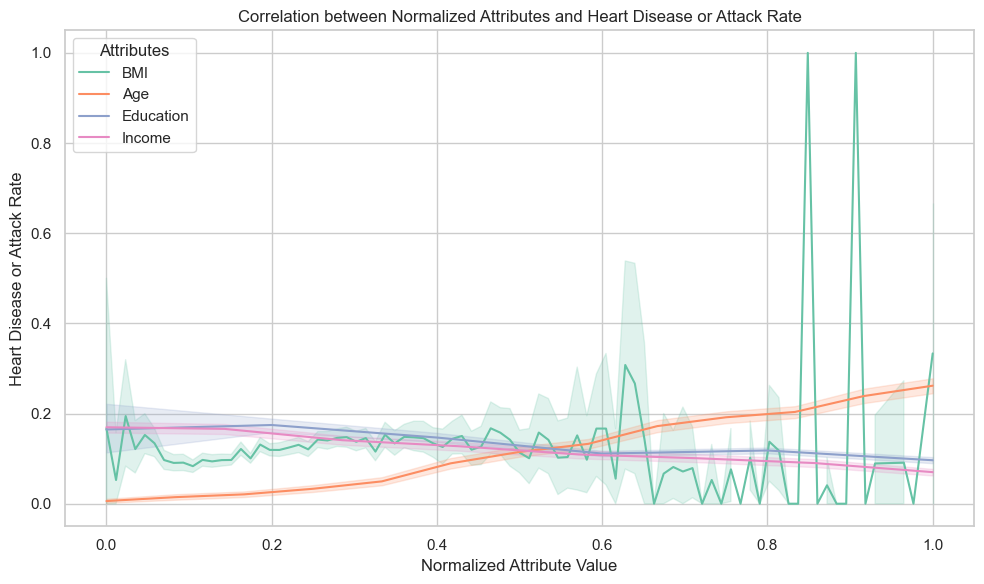

In [47]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the continuous columns (BMI, Age, Education, Income)
attributes = ['BMI', 'Age', 'Education', 'Income']

df_line=df.copy()

# Normalize the selected columns
df_line[attributes] = scaler.fit_transform(df[attributes])

# Group the data by the normalized attributes and calculate the mean diabetes rate
heart_rate = df_line.groupby(attributes)['HeartDiseaseorAttack'].mean().reset_index()

# Create a line plot for each attribute
plt.figure(figsize=(10, 6))

# Set the seaborn style
sns.set(style="whitegrid")

# Plot each attribute's line with a different color
for i, attr in enumerate(attributes):
    sns.lineplot(data=heart_rate, x=attr, y='HeartDiseaseorAttack', label=attr, color=sns.color_palette("Set2")[i])

# Set the labels and title
plt.xlabel('Normalized Attribute Value')
plt.ylabel('Heart Disease or Attack Rate')
plt.title('Correlation between Normalized Attributes and Heart Disease or Attack Rate')

# Show the legend
plt.legend(title='Attributes')

# Show the plot
plt.tight_layout()
plt.show()
